In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="datasets/")
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
print(X[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

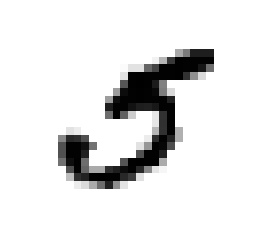

In [4]:
%matplotlib inline 
import matplotlib, matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

# imshow function is able to plot 2D data 
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
import numpy as np 
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary Classification 

In [7]:
# Binary Classifier that is able to detect one particular number
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

In [10]:
# Cross Validation 
from sklearn.model_selection import cross_val_score 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96125,  0.96775,  0.9515 ])

In [11]:
# Confusion Matrix
# A Confusing Matrix requires a set of predictions that can be compared to the actual targets
from sklearn.model_selection import cross_val_predict

# cross_val_predict will perform K-fold cross-validation and return predictions on each test fold 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [12]:
y_train_pred

array([False, False, False, ..., False, False,  True], dtype=bool)

In [13]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_train_5, y_train_pred)

# true negatives (correctly classified as non 5 digit): 53648
# false positives (wrongly classified): 931
# false negative (wrongly classified as non 5 digit): 1661
# true positive: 3760

array([[53971,   608],
       [ 1782,  3639]])

In [14]:
# A more concise metric would be Precision and Recall
# Precision represents the accuracy of positive predictions . 
# Recall represents the ratio of positive instances that are correctly detected by the classifier.

In [15]:
from sklearn.metrics import precision_score, recall_score 
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.856840122439
Recall:  0.671278361926


In [16]:
# Both Precision and Recall can be boiled down to one metric called the F1 Socre
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.75279271824575922

In [17]:
# Note classifiers such as SGDClassifier compute a score in order 
# to determine the class of an object by setting a 
# particular threshold 

# Here is a way to modify the threshold of a classifier in Scikit learn
y_scores = sgd_clf.decision_function([some_digit])

threshold = 200000
# Anything that has a score greater than 0 is considered to be a 5 now.
y_some_digit_pred = (y_scores > threshold)

# Print various thresholds using cross validation
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                 method="decision_function")

print(y_scores)

[-441747.05194211 -280314.60700457 -483633.67824373 ..., -505780.36317175
 -436862.30885307   64483.71774406]


In [18]:
# We can also plot precision and recall as functions of the threshold 
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [19]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

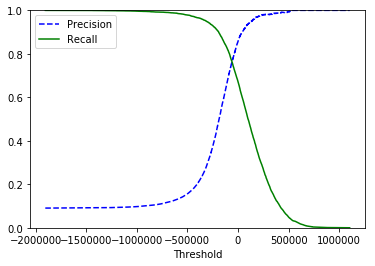

In [20]:
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

In [21]:
# ROC CURVE
from sklearn.metrics import roc_curve 

In [22]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

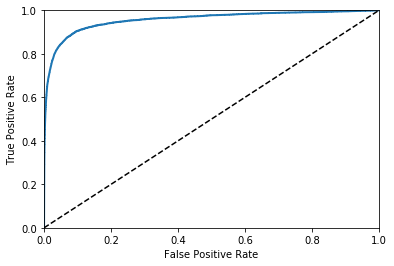

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
# AUC SCORE 
from sklearn.metrics import roc_auc_score 
roc_auc_score(y_train_5, y_scores)


0.95665395136968312

# Comparing Classifiers

In [25]:
# RandomForestClassifier vs SGDclassifier 
from sklearn.ensemble import RandomForestClassifier 

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [26]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

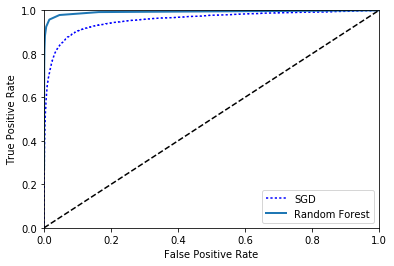

In [27]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="best")
plt.show()

In [28]:
roc_auc_score(y_train_5, y_scores_forest)

0.99254784723185685

# Multiclass Classification 

In [29]:
# Using 'one-versus-all' strategy 
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [30]:
print(sgd_clf.classes_)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


In [31]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.84433113,  0.87444372,  0.86032905])

In [32]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)

In [33]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5754,    1,   29,   24,   11,   39,   14,    4,   43,    4],
       [   1, 5978,  261,   34,    7,   43,   12,   35,  357,   14],
       [  67,   30, 5295,   99,   59,   33,   63,   84,  210,   18],
       [  78,   14,  300, 4986,   23,  387,   21,   75,  186,   61],
       [  29,   20,   64,   13, 5315,   89,   44,   43,   67,  158],
       [ 109,   18,   84,  322,  124, 4144,   79,   12,  464,   65],
       [  85,   11,  122,    8,   70,  119, 5382,   15,  101,    5],
       [  41,   10,  126,   32,   99,   29,    7, 5516,   62,  343],
       [  78,   61,  148,  148,   64,  580,   47,   68, 4584,   73],
       [  65,   27,   39,   98,  273,  316,    0,  369,  134, 4628]])

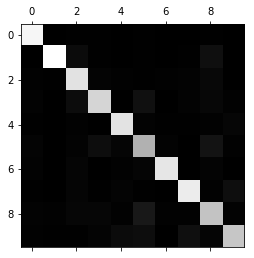

In [34]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [35]:
# Errors 
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

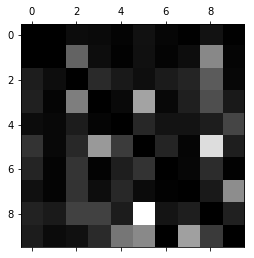

In [37]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# MultiLabel Classification 

In [39]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

In [ ]:
# One way of evaluating a MultiLabel Classifier is by using the average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")